In [21]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [22]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [23]:

mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [24]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [25]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    # mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
    #                          mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
    #                          mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
    #                          ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [10]:

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()
        print(frame)
        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

[[[166 157 160]
  [159 150 153]
  [167 158 160]
  ...
  [251 251 251]
  [252 252 252]
  [252 252 252]]

 [[165 156 159]
  [161 152 155]
  [169 160 162]
  ...
  [252 252 252]
  [252 252 252]
  [253 253 253]]

 [[163 154 157]
  [164 155 158]
  [170 161 163]
  ...
  [253 253 253]
  [253 253 253]
  [253 253 253]]

 ...

 [[ 53  75  73]
  [ 50  72  70]
  [ 46  67  68]
  ...
  [135 137 147]
  [135 137 148]
  [135 137 148]]

 [[ 56  78  73]
  [ 52  73  70]
  [ 46  68  67]
  ...
  [134 136 146]
  [134 136 147]
  [134 136 147]]

 [[ 57  79  74]
  [ 53  75  71]
  [ 46  68  67]
  ...
  [133 135 145]
  [133 135 146]
  [133 135 146]]]
<class 'mediapipe.python.solution_base.SolutionOutputs'>
[[[159 161 162]
  [153 155 156]
  [178 180 180]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[161 162 163]
  [154 155 156]
  [177 178 178]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[162 161 163]
  [156 156 157]
  [174 174 174]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 

In [8]:
# cap.release()
# cv2.destroyAllWindows()

In [9]:
draw_landmarks(frame, results)

NameError: name 'frame' is not defined

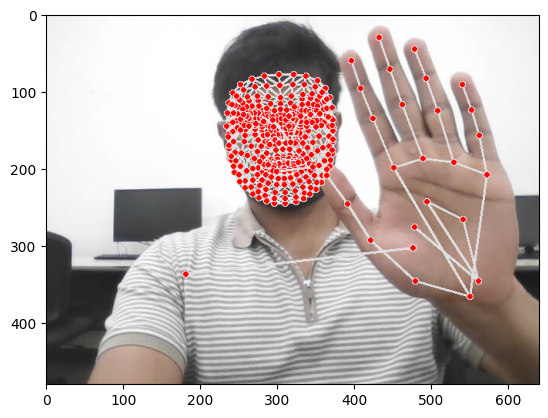

In [ ]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [ ]:

len(results.left_hand_landmarks.landmark)

21

In [ ]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [ ]:
# pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
# face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
# lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
# rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

NameError: name 'results' is not defined

In [ ]:
# face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [26]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, lh, rh])

In [14]:
result_test = extract_keypoints(results)

In [15]:
result_test.shape

(258,)

In [53]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data2') 

# Actions that we try to detect
actions = np.array(['How are you','Hello','Good','thank You','Goodbye'])
#actions = np.array(['Hello'])
# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

In [28]:
for action in actions: 
    
    for sequence in range(1,no_sequences+1):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [30]:
cap=cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    for action in actions:
        for sequence in range(1,no_sequences+1):
            for frame_num in range(1,sequence_length+1):
                ret, frame =cap.read()
                print(frame)
                image, results = mediapipe_detection(frame, holistic)
                draw_styled_landmarks(image, results)
                if frame_num == 1:
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(200)
                else:
                   cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                   cv2.imshow('OpenCV Feed', image)

                keypoints=extract_keypoints(results)
                
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path,keypoints)

                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
    cap.release()
    cv2.destroyAllWindows()

[[[121 133 187]
  [122 133 187]
  [124 133 187]
  ...
  [213 210 206]
  [213 210 206]
  [213 210 206]]

 [[121 133 187]
  [122 133 187]
  [124 133 187]
  ...
  [213 210 206]
  [213 210 206]
  [213 210 206]]

 [[120 133 185]
  [121 133 185]
  [123 132 185]
  ...
  [213 210 206]
  [213 210 206]
  [213 210 206]]

 ...

 [[121 150 201]
  [121 150 201]
  [120 150 201]
  ...
  [131 149 169]
  [130 148 168]
  [130 148 168]]

 [[121 150 200]
  [121 150 200]
  [120 150 201]
  ...
  [127 146 166]
  [126 145 165]
  [125 144 164]]

 [[121 151 200]
  [121 151 200]
  [120 150 201]
  ...
  [125 145 163]
  [124 144 162]
  [124 144 162]]]
[[[114 126 174]
  [114 126 174]
  [114 126 174]
  ...
  [204 203 199]
  [205 204 200]
  [205 204 200]]

 [[114 126 174]
  [114 126 174]
  [114 126 174]
  ...
  [204 203 199]
  [205 204 200]
  [205 204 200]]

 [[114 126 174]
  [114 126 174]
  [114 126 174]
  ...
  [204 203 199]
  [205 204 200]
  [205 204 200]]

 ...

 [[109 142 195]
  [110 141 196]
  [110 141 196]
  ..

In [92]:
cap.release()
cv2.destroyAllWindows()

In [54]:
from sklearn.model_selection import train_test_split


In [55]:
import keras
from keras.utils import to_categorical

In [56]:
label_map = {label:num for num, label in enumerate(actions)}

In [57]:
label_map

{'How are you': 0, 'Hello': 1, 'Good': 2, 'thank You': 3, 'Goodbye': 4}

In [58]:
sequences,labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH,action))).astype(int):
        window = []
        for frame_num in range(1,sequence_length+1):
            res=np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [59]:

np.array(sequences).shape

(150, 30, 258)

In [65]:
np.array(labels).shape

(150,)

In [60]:
X = np.array(sequences)

In [61]:
y = to_categorical(labels).astype(int)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.05)

In [63]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import TensorBoard

In [64]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [68]:
del model
model=Sequential()
model.add(LSTM(64, return_sequences=True, activation = 'relu', input_shape = (30,258)))
model.add(LSTM(128, return_sequences=True,activation='relu'))
model.add(LSTM(64,return_sequences=False, activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(actions.shape[0], activation = 'softmax'))

In [69]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [70]:

history=model.fit(X_train, y_train, epochs=100, callbacks=[tb_callback], validation_data=(X_test,y_test))

Epoch 1/100
5/5 [==============================] - 6s 206ms/step - loss: 1.7133 - categorical_accuracy: 0.1549 - val_loss: 1.6265 - val_categorical_accuracy: 0.0000e+00
Epoch 2/100
5/5 [==============================] - 0s 63ms/step - loss: 1.4092 - categorical_accuracy: 0.4648 - val_loss: 1.5766 - val_categorical_accuracy: 0.2500
Epoch 3/100
5/5 [==============================] - 0s 66ms/step - loss: 0.9591 - categorical_accuracy: 0.5563 - val_loss: 1.2049 - val_categorical_accuracy: 0.6250
Epoch 4/100
5/5 [==============================] - 0s 55ms/step - loss: 0.6175 - categorical_accuracy: 0.7887 - val_loss: 0.4171 - val_categorical_accuracy: 0.8750
Epoch 5/100
5/5 [==============================] - 0s 55ms/step - loss: 0.3628 - categorical_accuracy: 0.9296 - val_loss: 1.9169 - val_categorical_accuracy: 0.3750
Epoch 6/100
5/5 [==============================] - 0s 53ms/step - loss: 0.7737 - categorical_accuracy: 0.7042 - val_loss: 0.6418 - val_categorical_accuracy: 0.6250
Epoch 7/100

In [122]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 30, 64)            82688     
                                                                 


 lstm_16 (LSTM)              (None, 30, 128)           98816     
                                                                 
 lstm_17 (LSTM)              (None, 64)                49408     
                                                                 
 dense_15 (Dense)            (None, 64)                4160      
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 5)                 165       
                                                                 
Total params: 237317 (927.02 KB)
Trainable params: 237317 (927.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [123]:
res=model.predict(X_test)

1/1 [==============================] - 1s 1s/step


In [127]:
actions[np.argmax(res[1])]

'How are you'

In [126]:
actions[np.argmax(y_test[1])]

'How are you'

In [71]:
# model.save('hackAIweights.h5')
import joblib
joblib.dump(model, 'hackAIModelv2.pkl')

['hackAIModelv2.pkl']

In [ ]:
#To reload:-
model.load_weights('leftandright.h5')

In [72]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [ ]:
yhat= model.predict(X_test)
ytrue= np.argmax(y_test,axis=1).tolist()
yhat=np.argmax(yhat,axis=1).tolist()

1/1 [==============================] - 1s 1s/step


In [ ]:
multilabel_confusion_matrix(ytrue,yhat)

array([[[0, 0],
        [0, 3]]], dtype=int64)

In [ ]:
accuracy_score(ytrue,yhat)

1.0

In [ ]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epoch_count = range(1, len(training_loss) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epoch_count, training_loss, 'r--', label='Training Loss')
plt.plot(epoch_count, validation_loss, 'b-', label='Validation Loss')

# Add labels and title
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Show the plot
plt.show()


NameError: name 'history' is not defined

In [14]:
import joblib
joblib.load("hackAIModelWithDifferentHello.pkl")

In [15]:
colors = [(245,117,16), (117,245,16), (16,117,245), (120,231,16), (245,117,16)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [19]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        print(sequence)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])
                
            if len(sentence) > 3: 
                sentence = sentence[-3:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
[array([ 5.36607504e-02,  5.15467048e-01, -1.15928221e+00,  9.99349415e-01,
        8.05495009e-02,  4.30433005e-01, -1.12151873e+00,  9.98790681e-01,
        1.01916119e-01,  4.27162439e-01, -1.12176371e+00,  9.99020576e-01,
        1.20177522e-01,  4.25197005e-01, -1.12238765e+00,  9.98888671e-01,
        1.22638494e-02,  4.36785579e-01, -1.10141766e+00,  9.98641074e-01,
       -1.08099878e-02,  4.37201023e-01, -1.10033047e+00,  9.98650968e-01,
       -2.97979563e-02,  4.37627435e-01, -1.10067821e+00,  9.98245001e-01,
        1.57035142e-01,  4.47458953e-01, -7.03583002e-01,  9.99185503e-01,
       -3.52242440e-02,  4.54337806e-01, -5.83465159e-01,  9.98746991e-01,
        9.96351689e-02,  5.70800662e-01, -9.89214122e-01,  9.99570310e-01,
        2.13676691e-02,  5.85136294e-01, -9.55004036e-01,  9.99495029e-01,
        3.52337897e-01,  7.82678187e-01, -4.30252463e-01,  9.98807430e-01,
       -1.50218755e-01,  8.34458768e-01, -

NameError: name 'model' is not defined

In [20]:
cap.release()
cv2.destroyAllWindows()

In [2]:
import tensorflow
print(tensorflow.__version__)

2.13.0
